<a href="https://colab.research.google.com/github/soum707/Research-Papers/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Company Salary dataset Analysis and Modeling

In [ ]:
# Downloading the CSV from Google Drive
import gdown

url = 'https://drive.google.com/uc?export=download&id=1HI6YDaV-99lEGMk4LW3UIRS2h-zoPQls'

output = 'tech_companies_salary.csv'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1HI6YDaV-99lEGMk4LW3UIRS2h-zoPQls
To: /content/tech_companies_salary.csv
100%|██████████| 12.8M/12.8M [00:00<00:00, 22.1MB/s]


'tech_companies_salary.csv'

In [ ]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

# Initializing Libraries

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False).set_output(transform = 'pandas')
encoder2 = LabelEncoder()

scaler = RobustScaler()

In [ ]:
# Loading the CSV on pandas

tcs = pd.read_csv(output)
print(tcs.columns)
print(tcs.head(3))

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')
          timestamp company level              title  totalyearlycompensation  \
0  06-07-2017 11:33  Oracle    L3    Product Manager                   127000   
1  06-10-2017 17:11    eBay  SE 2  Software Engineer                   100000   
2  06-11-2017 14:53  Amazon    L7    Product Manager                   310000   

            location  yearsofexperience  yearsatcompany  tag  basesalary  ...  \
0   Redwood City, CA                1.5             1.5  NaN      107000  ...   
1  San Francisco, CA             

Handling Data
===============

In [ ]:
# Converting Timestamp to Date
tcs['timestamp'] = pd.to_datetime(tcs['timestamp'], format='mixed').dt.date

print((tcs['timestamp']).head(3))

0    2017-06-07
1    2017-06-10
2    2017-06-11
Name: timestamp, dtype: object


In [ ]:
# Converting Gender to binary data

tcs['numgender'] = tcs['gender'].map({'Male': 1, 'Female': 0})
print((tcs['numgender']).tail(10))

62632    NaN
62633    NaN
62634    NaN
62635    NaN
62636    NaN
62637    NaN
62638    NaN
62639    NaN
62640    NaN
62641    1.0
Name: numgender, dtype: float64


In [ ]:
# Finding missing data

total_rows = tcs.shape[0]

missing_gender = tcs[tcs['gender'].isna()].shape[0]
missing_edu = tcs[tcs['Education'].isna()].shape[0]
missing_race = tcs[tcs['Race'].isna()].shape[0]
missing_tag = tcs[tcs['tag'].isna()].shape[0]

missing_categorical = tcs[tcs['Race'].isna() & tcs['Education'].isna() & tcs['gender'].isna()].shape[0]

# Creating missing data percentage

missing_gender_percentage = round(((missing_gender/(total_rows))*100), 2)
print(f"Percentage of missing gender data: {missing_gender_percentage}%")
missing_edu_percentage = round(((missing_edu/(total_rows))*100), 2)
print(f"Percentage of missing education data: {missing_edu_percentage}%")
missing_race_percentage = round(((missing_race/(total_rows))*100), 2)
print(f"Percentage of missing race data: {missing_race_percentage}%")
missing_tag_percentage = round(((missing_tag/(total_rows))*100), 2)
print(f"Percentage of missing tag data: {missing_tag_percentage}%\n")
missing_cat_percentage = round(((missing_categorical/(tcs.shape[0]))*100), 2)
print(f"Percentage of missing education, race, and gender data: {missing_cat_percentage}%")

Percentage of missing gender data: 31.19%
Percentage of missing education data: 51.52%
Percentage of missing race data: 64.2%
Percentage of missing tag data: 1.39%

Percentage of missing education, race, and gender data: 26.99%


In [ ]:
# Filling the missing data using Simple Imputer

imputer = SimpleImputer(strategy='most_frequent') # possible models ('constant', 'mean', 'median', 'most_frequent')
tcs[['gender', 'Race', 'Education']] = imputer.fit_transform(tcs[['gender', 'Race', 'Education']])

tcs['dmaid'] = pd.to_numeric(tcs['dmaid']).fillna(0).astype(int)

# Checking to see if the missing data is filled

handled_gender = tcs[tcs['gender'].isna()].shape[0]
handled_edu = tcs[tcs['Education'].isna()].shape[0]
handled_race = tcs[tcs['Race'].isna()].shape[0]

handled_gender_percentage = round(((handled_gender/(total_rows))*100), 2)
handled_edu_percentage = round(((handled_edu/(total_rows))*100), 2)
handled_race_percentage = round(((handled_race/(total_rows))*100), 2)

print(f"Percentage of missing education data after handling: {handled_edu_percentage}%")
print(f"Percentage of missing race data after handling: {handled_race_percentage}%")
print(f"Percentage of missing gender data after handling: {handled_gender_percentage}%")

Percentage of missing education data after handling: 0.0%
Percentage of missing race data after handling: 0.0%
Percentage of missing gender data after handling: 0.0%


In [ ]:
# One Hot Encoding Race and Education || changing gender to binary

tcs['mnumgender'] = tcs['gender'].map({'Male': 1, 'Female': 0})

cat = tcs.filter(["Education", "Race"])
catnum = encoder.fit_transform(cat)
catcolumns = encoder.get_feature_names_out(input_features = cat.columns)

# Label Encoding tag

tcs['mtag'] = encoder2.fit_transform(tcs['tag'])

# Creating a new dataset with relevent columns

tcs2 = tcs[['timestamp', 'company', 'title', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'mtag', 'basesalary', 'mnumgender', 'cityid', 'dmaid']]

tcs2 = pd.concat([tcs2, catnum], axis = 1)
print(tcs2.columns)

Index(['timestamp', 'company', 'title', 'totalyearlycompensation',
       'yearsofexperience', 'yearsatcompany', 'mtag', 'basesalary',
       'mnumgender', 'cityid', 'dmaid', 'Education_Bachelor's Degree',
       'Education_Highschool', 'Education_Master's Degree', 'Education_PhD',
       'Education_Some College', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Two Or More', 'Race_White'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Dropping outliers in Total Yearly Compensation

Q1 = np.percentile(tcs2['totalyearlycompensation'], 25)
Q3 = np.percentile(tcs2['totalyearlycompensation'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

tcs2 = tcs2[(tcs2['totalyearlycompensation'] >= lower_bound) & (tcs2['totalyearlycompensation'] <= upper_bound)]

Visualizations
===============

In [ ]:
# Breaking down the Variables

tcs2_education = tcs2[["Education_Bachelor's Degree", "Education_Highschool", "Education_Master's Degree", "Education_PhD", "Education_Some College"]]

tcs2_race = tcs2[['Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Two Or More', 'Race_White']]

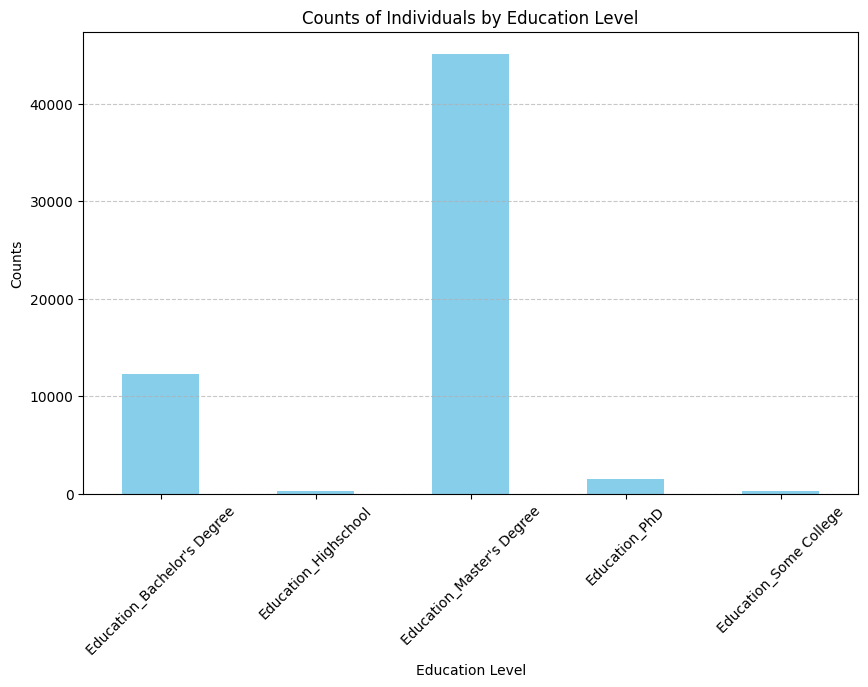

In [ ]:
# Education (Masters Degree is the variable used to fill the missing data)

tcs2_edu_sum = tcs2_education.sum()
plt.figure(figsize=(10, 6))
tcs2_edu_sum.plot(kind='bar', color='skyblue')
plt.title('Counts of Individuals by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

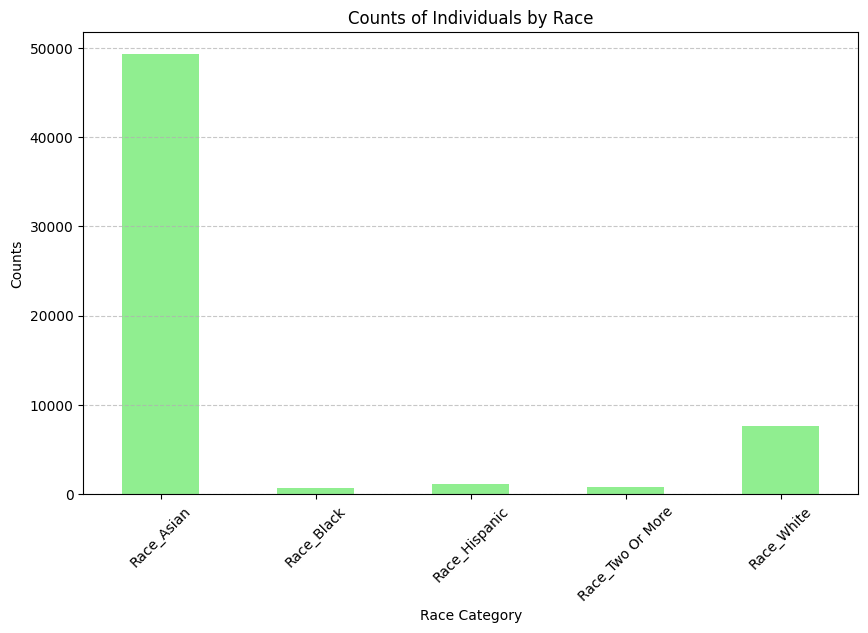

In [ ]:
# Race (Race Asians is the variable used to fill the missing data)

tcs2_race_sum = tcs2_race.sum()
plt.figure(figsize=(10, 6))
tcs2_race_sum.plot(kind='bar', color='lightgreen')
plt.title('Counts of Individuals by Race')
plt.xlabel('Race Category')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

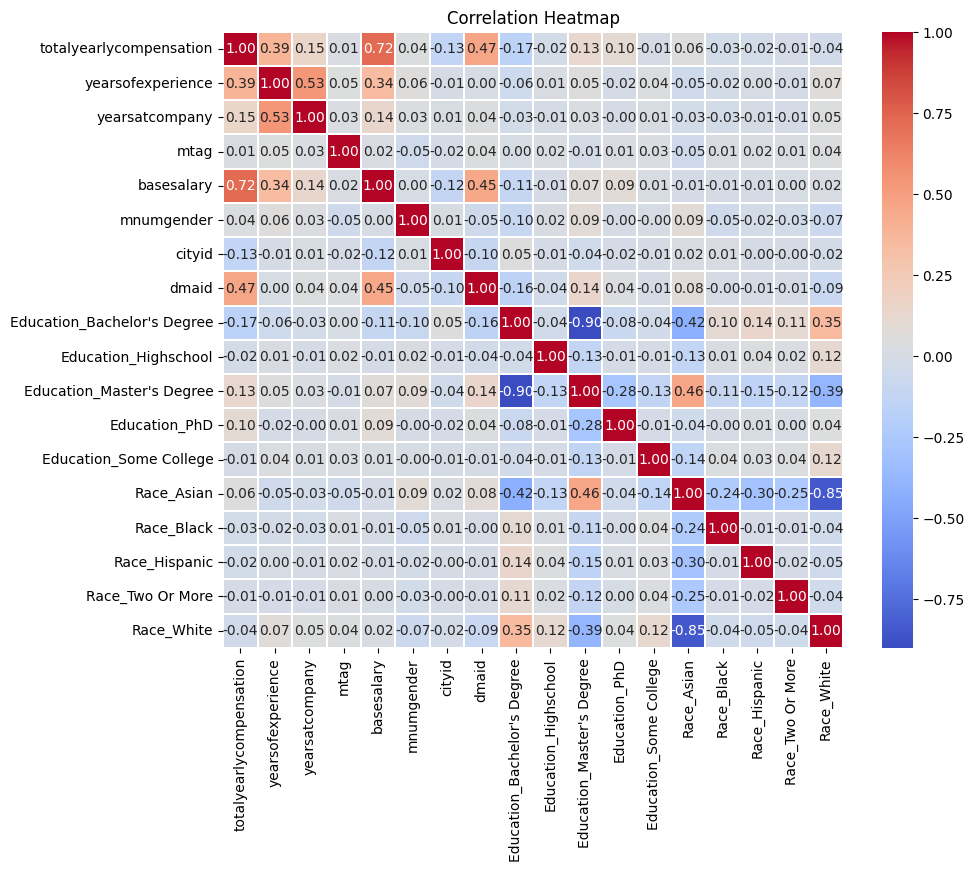

Highly correlated features: totalyearlycompensation        1.000000
yearsofexperience              0.388301
yearsatcompany                 0.151275
basesalary                     0.722897
cityid                         0.128553
dmaid                          0.467260
Education_Bachelor's Degree    0.165769
Education_Master's Degree      0.125618
Name: totalyearlycompensation, dtype: float64


In [ ]:
# Correlation Heatmap (Race Asians, and Masters Degree are variables used to fill the missing data)

numeric_cols = tcs2.select_dtypes(include=['number'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Heatmap')
plt.show()

cor_target = abs(correlation_matrix["totalyearlycompensation"])
relevant_features = cor_target[cor_target > 0.1]
print("Highly correlated features:", relevant_features)

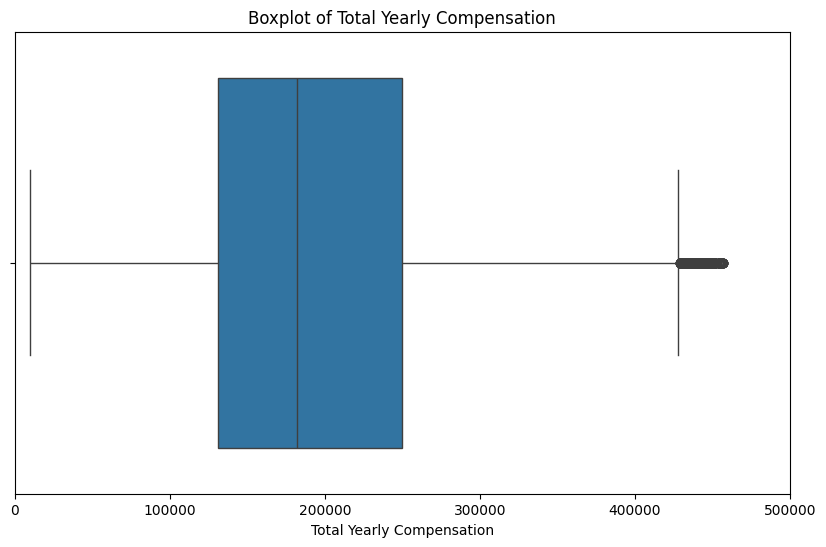

In [ ]:
# Box plot for total yearly compensation

plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
sns.boxplot(x='totalyearlycompensation', data=tcs2)

plt.title('Boxplot of Total Yearly Compensation')
plt.xlabel('Total Yearly Compensation')
plt.xlim(0, 500000)
plt.show()


# Modeling

In [ ]:
# Creating Y variables and X variables

y = tcs2['totalyearlycompensation']
X = tcs2[['dmaid', 'yearsofexperience', "Education_Bachelor's Degree", "Education_Master's Degree"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# List of Variables to choose from

print(tcs2.columns)

Index(['timestamp', 'company', 'title', 'totalyearlycompensation',
       'yearsofexperience', 'yearsatcompany', 'mtag', 'basesalary',
       'mnumgender', 'cityid', 'dmaid', 'Education_Bachelor's Degree',
       'Education_Highschool', 'Education_Master's Degree', 'Education_PhD',
       'Education_Some College', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Two Or More', 'Race_White'],
      dtype='object')


In [ ]:
# List of models to be trained and tested

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'Support Vector Machine': SVR()
}

Training Linear Regression...


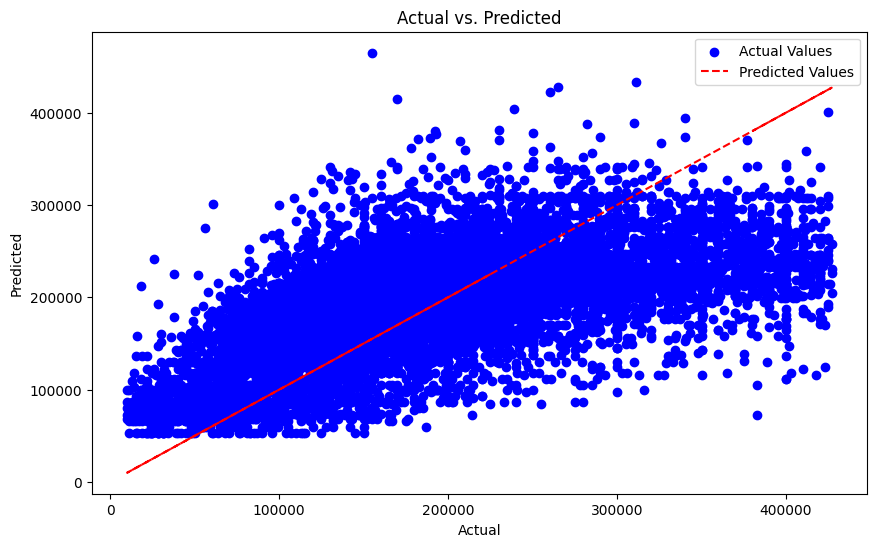

Metrics for Linear Regression:
Mean Squared Error: 5215224275.764072
Mean Absolute Error: 55938.039879613185
R^2 Score: 0.3674208048709746
Adjusted R^2 Score: 0.3672081195906085
Training Random Forest...


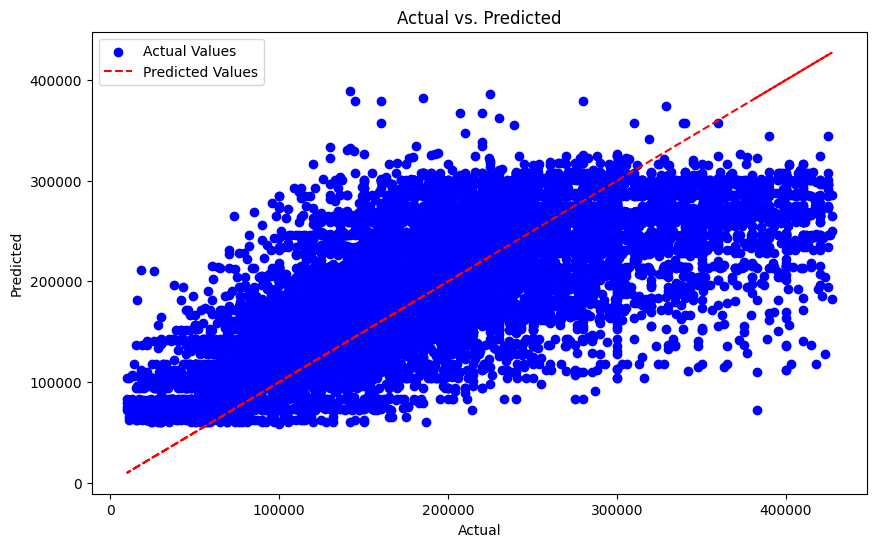

Metrics for Random Forest:
Mean Squared Error: 4451353246.052716
Mean Absolute Error: 50794.92643859288
R^2 Score: 0.4600743314705369
Adjusted R^2 Score: 0.45989279808614436
Training K-Nearest Neighbors...


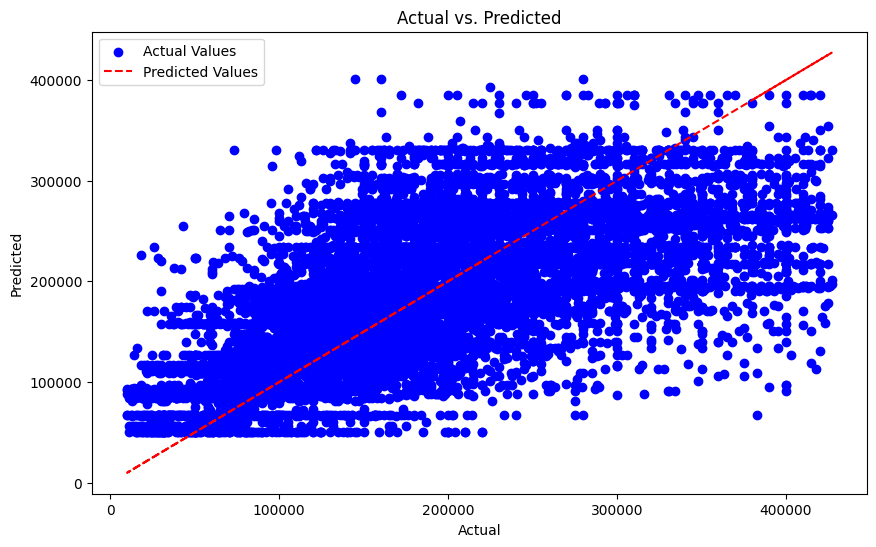

Metrics for K-Nearest Neighbors:
Mean Squared Error: 5339799651.319106
Mean Absolute Error: 55514.61098974962
R^2 Score: 0.35231046893245854
Adjusted R^2 Score: 0.35209270326680586
Training XGBoost...


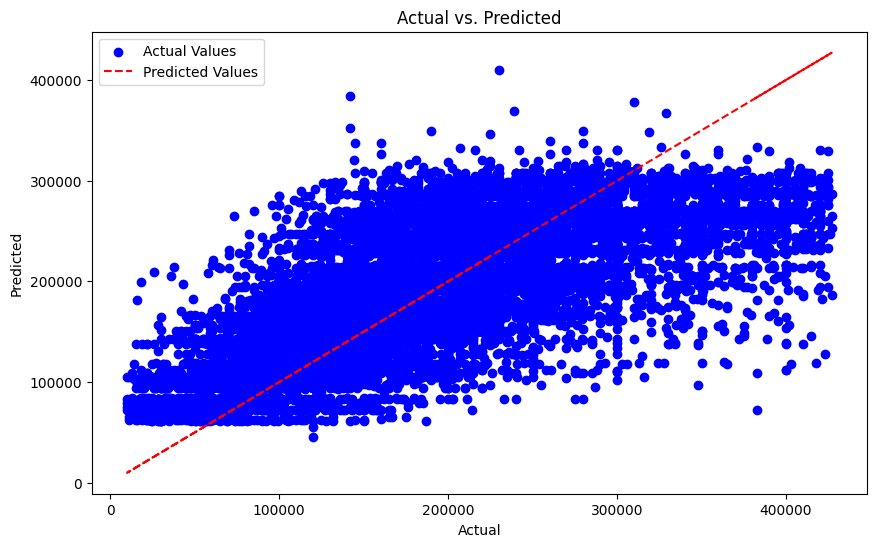

Metrics for XGBoost:
Mean Squared Error: 4391624851.921408
Mean Absolute Error: 50427.219429704564
R^2 Score: 0.4673190706203977
Adjusted R^2 Score: 0.46713997305651445
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 47607, number of used features: 4
[LightGBM] [Info] Start training from score 195324.836810


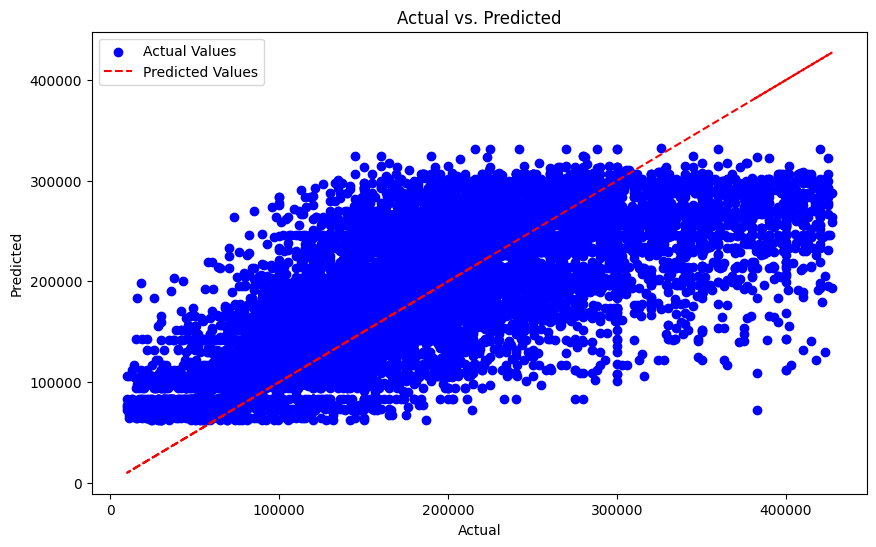

Metrics for LightGBM:
Mean Squared Error: 4362209251.682715
Mean Absolute Error: 50372.390691223416
R^2 Score: 0.47088702776649816
Adjusted R^2 Score: 0.47070912981836543
Training Support Vector Machine...


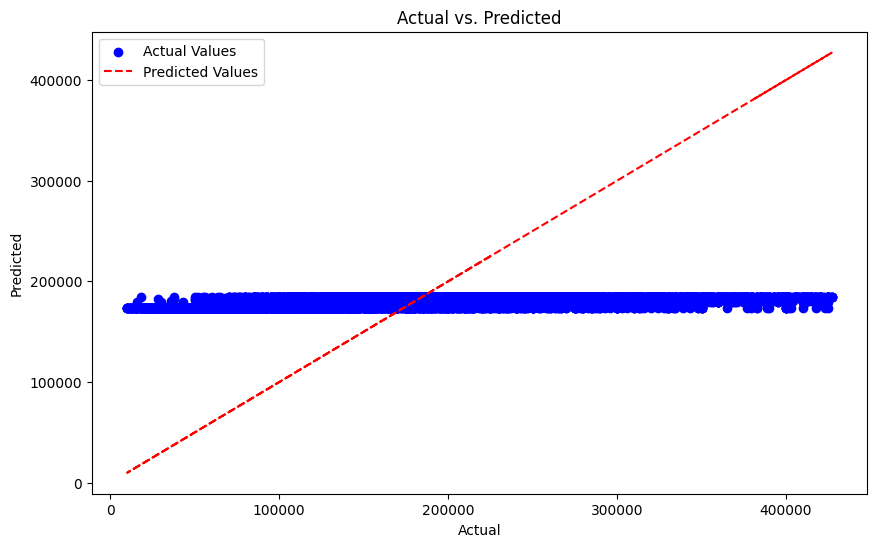

Metrics for Support Vector Machine:
Mean Squared Error: 8143342812.64806
Mean Absolute Error: 69672.81257056986
R^2 Score: 0.012255471730420409
Adjusted R^2 Score: 0.011923373040576113


In [ ]:
# Running and training the models

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    n = len(y_test)
    p = X.shape[1]

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjr2 =  1 - (((1 - r2) * (n - 1)) / (n - p - 1))


    Q1 = np.percentile(y_test, 25)
    Q3 = np.percentile(y_test, 75)
    IQR = Q3 - Q1

    # Filter out outlier indices
    outlier_indices = ((y_test < (Q1 - 1.5 * IQR)) | (y_test > (Q3 + 1.5 * IQR)))

    plt.figure(figsize=(10,6))
    plt.scatter(y_test[~outlier_indices], y_pred[~outlier_indices], color='blue', label='Actual Values')  # Use ~outlier_indices to filter out
    plt.plot(y_test[~outlier_indices], y_test[~outlier_indices], color='red', linestyle='--', label='Predicted Values')
    plt.title('Actual vs. Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()


    print(f"Metrics for {name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Adjusted R^2 Score: {adjr2}")
    print("==========================================")

In [ ]:
github test

In [ ]:
github test 2

In [ ]:
test 3